## Time Series Forecasting using Linear Regression

Here I have tried Time Series forecasting using 3 methods
1. LinearRegression (Not able to forecast Seasonality)
2. LinearRegression (Added preprocessing to detect Seasonality)
3. Naive Method

Finally, I have compared the error by these 3 methods

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./Champagne_Monthly_Sales.csv", index_col='Month', parse_dates=True)
data.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [3]:
#adding a detector for each month to be used for modelling
data['time'] = range(1, data.shape[0]+1)
data

,Sales,time
Month,,
1964-01-01,2815,1
1964-02-01,2672,2
1964-03-01,2755,3
1964-04-01,2721,4
1964-05-01,2946,5
...,...,...
1972-05-01,4618,101
1972-06-01,5312,102
1972-07-01,4298,103


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['time'], data['Sales'], test_size=0.2, random_state=0, shuffle=False)

In [8]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model_trained = model.fit(X_train, y_train)
y_test['pred'] = model_trained.predict(X_test)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(train_series, test_df, test_col, pred_col, pred_msg):
    plt.figure(figsize = (12,8))
    plt.plot(train_series, label='Train')
    plt.plot(test_df[test_col], label='test')
    plt.plot(test_df[pred_col], label=pred_msg)
    plt.legend(loc='best')
    plt.show()

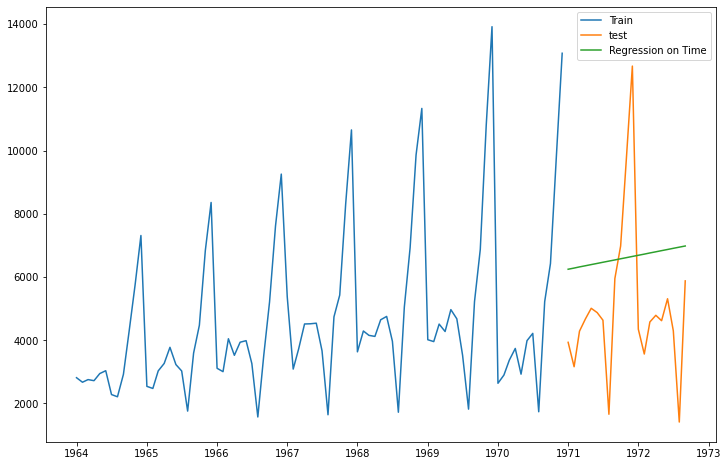

In [13]:
plot_graph(y_train, y_test, 'Sales', 'pred', 'Regression on Time')

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(y_train, label='Train')
plt.plot(y_test['Sales'], label='test')
plt.plot(y_test['pred'], label='Regression on Time')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
def cal_residual(y_test, actual_col, pred_col):
    rmse = np.sqrt(mean_squared_error(y_test[actual_col], y_test[pred_col]))
    abs_error = np.abs(y_test[actual_col] - y_test[pred_col])
    mape = np.round(np.mean(abs_error/y_test[actual_col]), 3)
    return rmse, mape

In [16]:
lr_rmse, lr_mape=cal_residual(y_test, 'Sales', 'pred')

In [17]:
#Creating a dataframe to store output of all models to compare it at the end
simple_list = [['LinearRegression_on_time', lr_rmse, lr_mape]]

In [18]:
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
even = monthSeasonality*8 
last = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9']
data['month_seasonality'] = even+last
data

,Sales,time,month_seasonality
Month,,,
1964-01-01,2815,1,m1
1964-02-01,2672,2,m2
1964-03-01,2755,3,m3
1964-04-01,2721,4,m4
1964-05-01,2946,5,m5
...,...,...,...
1972-05-01,4618,101,m5
1972-06-01,5312,102,m6
1972-07-01,4298,103,m7


In [19]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded

,Sales,time,month_seasonality_m10,month_seasonality_m11,month_seasonality_m12,month_seasonality_m2,month_seasonality_m3,month_seasonality_m4,month_seasonality_m5,month_seasonality_m6,month_seasonality_m7,month_seasonality_m8,month_seasonality_m9
Month,,,,,,,,,,,,,
1964-01-01,2815,1,0,0,0,0,0,0,0,0,0,0,0
1964-02-01,2672,2,0,0,0,1,0,0,0,0,0,0,0
1964-03-01,2755,3,0,0,0,0,1,0,0,0,0,0,0
1964-04-01,2721,4,0,0,0,0,0,1,0,0,0,0,0
1964-05-01,2946,5,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972-05-01,4618,101,0,0,0,0,0,0,1,0,0,0,0
1972-06-01,5312,102,0,0,0,0,0,0,0,1,0,0,0
1972-07-01,4298,103,0,0,0,0,0,0,0,0,1,0,0


In [20]:
#separating data for train and test
y = data_encoded['Sales']
X = data_encoded.loc[:,data_encoded.columns!='Sales']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [21]:
model_with_seasonality = model.fit(X_train_s, y_train_s)
y_test_s = pd.DataFrame(y_test_s)
y_test_s['pred_s'] = model_with_seasonality.predict(X_test_s)

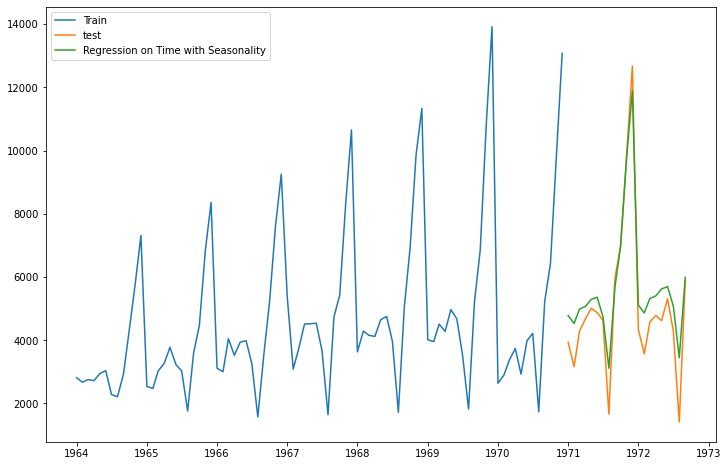

In [23]:
plot_graph(y_train_s, y_test_s, 'Sales', 'pred_s', 'Regression on Time with Seasonality')

In [24]:
lr_rmse_s, lr_mape_s = cal_residual(y_test_s, 'Sales', 'pred_s')
simple_list.append(['LinearRegression_on_time_seasonlaity', lr_rmse_s, lr_mape_s])

## Naive Method

In [25]:
train_sales = np.array(y_train)

In [26]:
naive_pred = pd.DataFrame(y_test['Sales'])

In naive method the last reading is considered as forecasted

In [27]:
naive_pred['pred_naive'] = train_sales[len(train_sales)-1]
naive_pred

,Sales,pred_naive
Month,,
1971-01-01,3934,13076
1971-02-01,3162,13076
1971-03-01,4286,13076
1971-04-01,4676,13076
1971-05-01,5010,13076
1971-06-01,4874,13076
1971-07-01,4633,13076
1971-08-01,1659,13076
1971-09-01,5951,13076


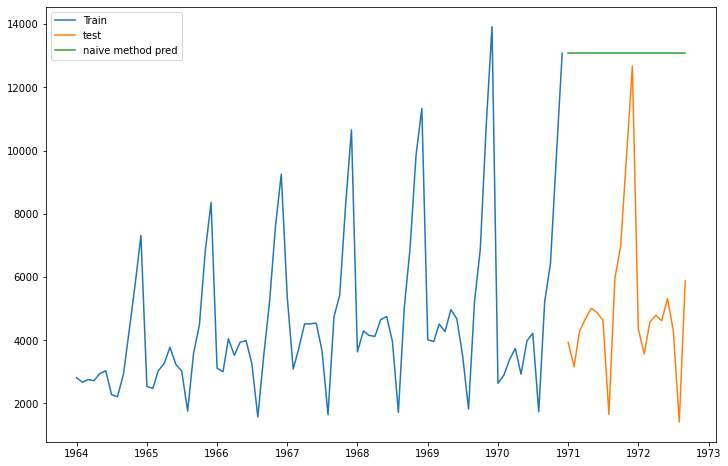

In [29]:
plot_graph(y_train_s, naive_pred, 'Sales', 'pred_naive', 'naive method pred')

In [30]:
nm_rmse, nm_mape = cal_residual(naive_pred, 'Sales', 'pred_naive')
simple_list.append(['Naive Method', nm_rmse, nm_mape])

In [33]:
df=pd.DataFrame(simple_list,columns=['Method','RMSE', 'MAPE'])
df

,Method,RMSE,MAPE
0,LinearRegression_on_time,2850.376113,0.718
1,LinearRegression_on_time_seasonlaity,858.663270,0.230
2,Naive Method,8356.449052,2.229


#### Among these three, we found linear Regression with Seasonality component is performing better.
In Next part, I will check ExponentialSmoothing family and ARIMA family methods